In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

import glob
from tqdm import tqdm 

# Instance Segmentation with YoloV8

In [2]:
# Load a model
model = YOLO('../models/yolov8n-seg.pt')  # pretrained YOLOv8n model

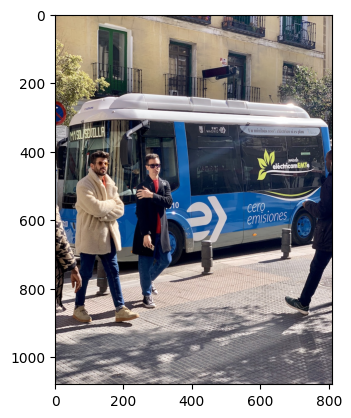

In [3]:
# Read an image
image = cv2.imread('../images/bus.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [4]:
results = model.predict(image)


0: 640x480 4 persons, 1 bus, 1 skateboard, 148.2ms
Speed: 6.0ms preprocess, 148.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)


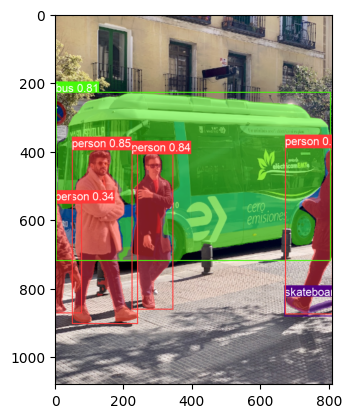

In [5]:
res_plotted = results[0].plot(pil=True)
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.show()

# Review the Result Shapes

In [6]:
results[0].masks[0].xy[0].astype(int)

array([[804, 391],
       [794, 401],
       [794, 403],
       [791, 406],
       [791, 408],
       [789, 410],
       [789, 423],
       [788, 425],
       [788, 430],
       [789, 432],
       [789, 445],
       [791, 447],
       [791, 450],
       [793, 452],
       [793, 453],
       [794, 455],
       [794, 465],
       [793, 467],
       [793, 469],
       [789, 472],
       [789, 475],
       [788, 477],
       [788, 479],
       [786, 480],
       [786, 482],
       [784, 484],
       [784, 486],
       [783, 487],
       [783, 489],
       [777, 494],
       [777, 496],
       [776, 497],
       [776, 501],
       [774, 502],
       [774, 506],
       [772, 507],
       [772, 509],
       [771, 511],
       [771, 516],
       [769, 518],
       [769, 519],
       [767, 521],
       [767, 528],
       [766, 529],
       [766, 533],
       [761, 538],
       [757, 538],
       [756, 536],
       [754, 536],
       [752, 534],
       [744, 534],
       [742, 536],
       [740,

In [7]:
results[0].masks[0].xy[0].shape

(245, 2)

# Draw Segmentations One-by-one with OpenCV

In [8]:
img_temp = image.copy()

k=0

for mask in results[0].masks:
    p1 = [-1, -1]
    p2 = [-1, -1]

    for i, xy in enumerate(mask.xy):
        points = xy.astype(int)
        print([points])
        img_temp = cv2.drawContours(img_temp, [points], 0, (0, 0, 255), 5)
    # print(i)
    
    k+=1
    if k==2:
        break

[array([[804, 391],
       [794, 401],
       [794, 403],
       [791, 406],
       [791, 408],
       [789, 410],
       [789, 423],
       [788, 425],
       [788, 430],
       [789, 432],
       [789, 445],
       [791, 447],
       [791, 450],
       [793, 452],
       [793, 453],
       [794, 455],
       [794, 465],
       [793, 467],
       [793, 469],
       [789, 472],
       [789, 475],
       [788, 477],
       [788, 479],
       [786, 480],
       [786, 482],
       [784, 484],
       [784, 486],
       [783, 487],
       [783, 489],
       [777, 494],
       [777, 496],
       [776, 497],
       [776, 501],
       [774, 502],
       [774, 506],
       [772, 507],
       [772, 509],
       [771, 511],
       [771, 516],
       [769, 518],
       [769, 519],
       [767, 521],
       [767, 528],
       [766, 529],
       [766, 533],
       [761, 538],
       [757, 538],
       [756, 536],
       [754, 536],
       [752, 534],
       [744, 534],
       [742, 536],
       [740

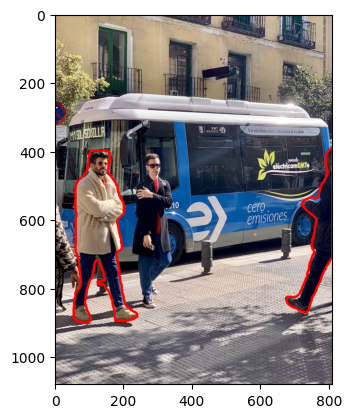

In [9]:
plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))

In [10]:
points.shape

(352, 2)

In [11]:
type(points)

numpy.ndarray

# Read the Annotation Files

In [12]:
!chdir

H:\My Drive\Projects\yolo-segmentation-tool\notebooks


In [13]:
dataset_PATH = "../data/example_dataset_1_YOLO/"

In [14]:
folders = glob.glob(dataset_PATH+"/*/")
folders

['../data/example_dataset_1_YOLO\\train\\',
 '../data/example_dataset_1_YOLO\\test\\',
 '../data/example_dataset_1_YOLO\\val\\']

In [15]:
print(glob.glob(dataset_PATH+"/*"))
print(glob.glob(dataset_PATH+"/*/"))   # find just folders
print(folders)
print(folders[0].split("\\"))
print(folders[0].split("\\")[-2])

['../data/example_dataset_1_YOLO\\train', '../data/example_dataset_1_YOLO\\data.yaml', '../data/example_dataset_1_YOLO\\test', '../data/example_dataset_1_YOLO\\val']
['../data/example_dataset_1_YOLO\\train\\', '../data/example_dataset_1_YOLO\\test\\', '../data/example_dataset_1_YOLO\\val\\']
['../data/example_dataset_1_YOLO\\train\\', '../data/example_dataset_1_YOLO\\test\\', '../data/example_dataset_1_YOLO\\val\\']
['../data/example_dataset_1_YOLO', 'train', '']
train


In [16]:
glob.glob(dataset_PATH+"/train/*")

['../data/example_dataset_1_YOLO//train\\images',
 '../data/example_dataset_1_YOLO//train\\labels']

In [17]:
glob.glob(dataset_PATH+"/train/images/*")

['../data/example_dataset_1_YOLO//train/images\\vertical_1.jpg',
 '../data/example_dataset_1_YOLO//train/images\\vertical_2.jpg']

Processing in train...


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

image_PATH:  ../data/example_dataset_1_YOLO//train//images\vertical_1.jpg
image_name:  vertical_1.jpg
label_PATH:  ../data/example_dataset_1_YOLO//train//labels/vertical_1.txt
Image Width and Height: 1536, 2048


POINTS NEW Shape:
 (44, 2)


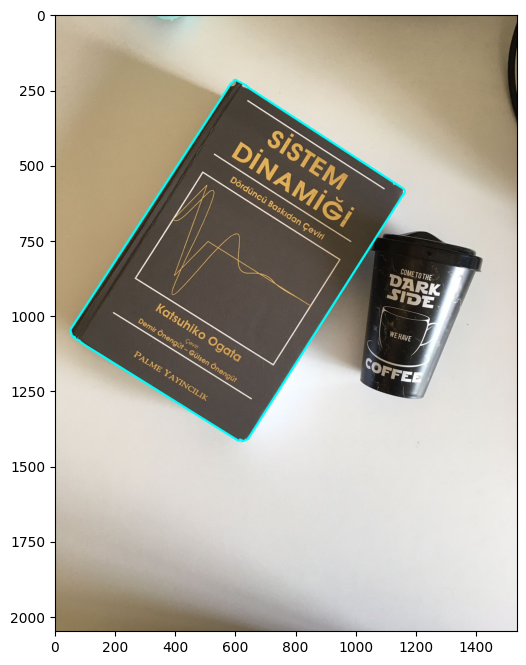


POINTS NEW Shape:
 (58, 2)


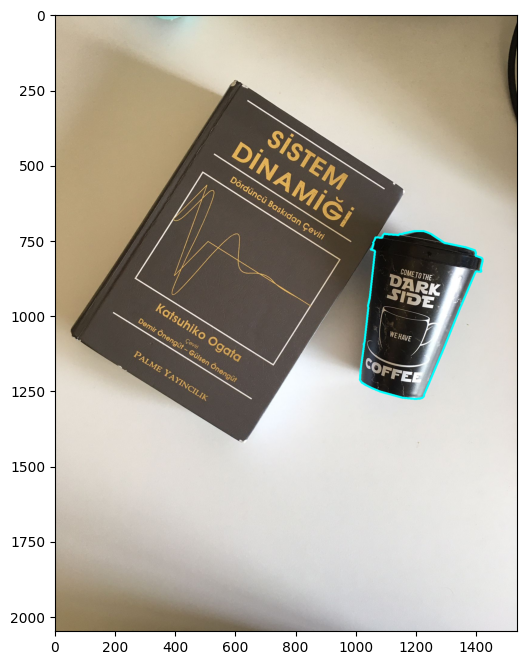

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.24s/it]


image_PATH:  ../data/example_dataset_1_YOLO//train//images\vertical_2.jpg
image_name:  vertical_2.jpg
label_PATH:  ../data/example_dataset_1_YOLO//train//labels/vertical_2.txt
Image Width and Height: 768, 1024


POINTS NEW Shape:
 (22, 2)


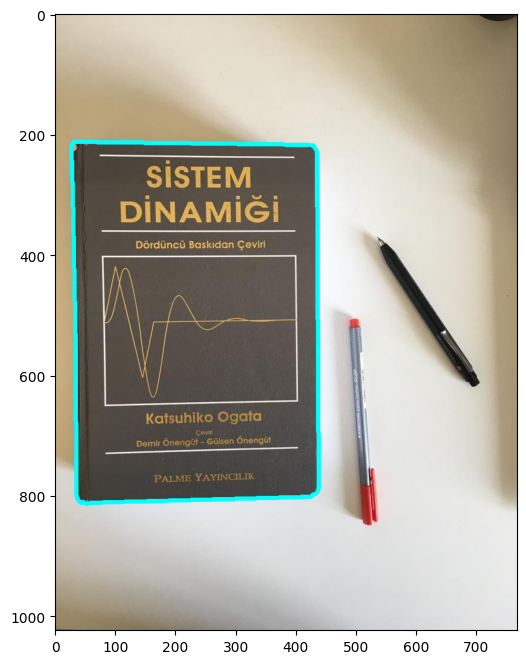


POINTS NEW Shape:
 (21, 2)


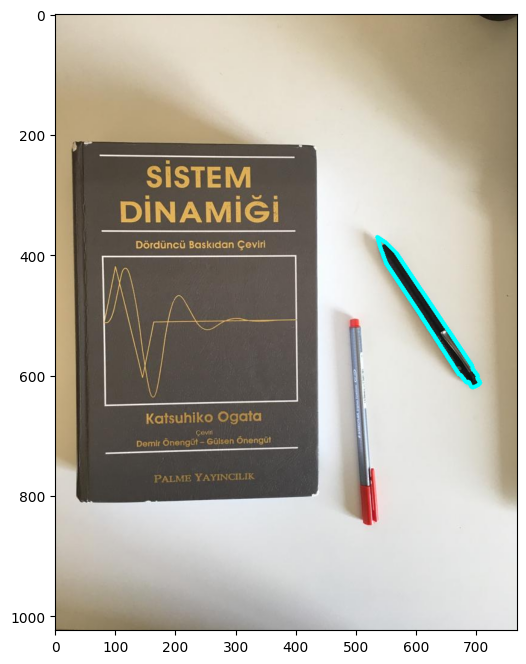


POINTS NEW Shape:
 (22, 2)


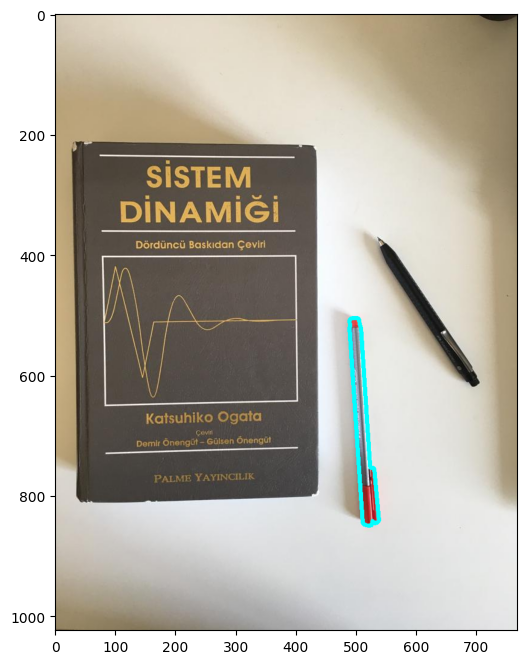

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.07s/it]



Processing in test...


0it [00:00, ?it/s]


Processing in val...


0it [00:00, ?it/s]


In [18]:
# reading annotations from files and draw o image

# find all images and annotations in the train, test, and val folders if they exists
for folder in glob.glob(dataset_PATH+"/*/"):
    folder_name = folder.split("\\")[-2]    # it suppose to be train, test, val
    print(f"Processing in {folder_name}...")
    
    sub_folder_PATH = f"{dataset_PATH}/{folder_name}/"    #  PATH of train, test, val
    
    # sub_folders_names = ["images", "labels"]
    
    for image_PATH in tqdm(glob.glob(sub_folder_PATH+"/images/*")):
        image_name = image_PATH.split("\\")[-1]
        label_PATH = f"{sub_folder_PATH}/labels/{image_name.split('.')[0]}.txt"
        
        print("image_PATH: ", image_PATH)
        print("image_name: ", image_name)
        print("label_PATH: ", label_PATH)
        
        image = cv2.imread(image_PATH)
        img_height, img_width, _ = image.shape
        print(f"Image Width and Height: {img_width}, {img_height}")
        
        
        print()
        # read the annotation file
        # Parse the YOLO annotation file
        with open(label_PATH, "r") as file:
            lines = file.readlines()
        # print(lines)
        
        for line in lines:
            data = line.strip().split()
            # print(data)
            
            class_id = int(data[0])
            points = list(map(float, data[1:]))
            
            # split x and y. Also scale for image width and height
            x = np.array(points[0::2])*img_width
            y = np.array(points[1::2])*img_height
            
            # merge x and y as a points 
            points_new = np.array(list(zip(x, y))).astype(int)
            print("\nPOINTS NEW Shape:\n", points_new.shape)
            # print("\nPOINTS NEW:\n", points_new)
            # print("\n",points_new[0][0], type(points_new[0][0]))
            
            
            # draw segmentations
            color = (255, 255, 0)  # Green color
            thickness = 5
            # print("Before draw contours points_new.shape: ", points_new.shape)
            # print("Before draw contours points_new.shape: ", [points_new])
            img = cv2.drawContours(image.copy(), [points_new], -1, color, thickness)
            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.show()
            
            
        print()